In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import re

random.seed(8)

#running full file, commenting out sample code, added line without skips
read_file = "parking-citations.csv"
#new_data = read_file.dropna(axis = 0, how ='any')
#n = sum(1 for line in open(read_file)) - 1
#s = 5000
#skip = sorted(random.sample(range(1, n+1), n-s))
#file_df = pd.read_csv(read_file, skiprows=skip)
file_df = pd.read_csv(read_file)
file_df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [ ]:
#holding code
#n = sum(1 for line in open(read_file)) - 1
#s = 5000
#skip = sorted(random.sample(range(1, n+1), n-s))
#file_df = pd.read_csv(read_file, skiprows=skip)
#file_df.head()

In [2]:
#DataFrame created from original information
hwdf = file_df.drop(columns = ["Ticket number", "Meter Id", "Marked Time", "Plate Expiry Date", "VIN", "Route",
                               "Agency", "Violation code"])
hwdf.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
3,2015-12-26T00:00:00,1515.0,CA,ACUR,PA,WH,100 WORLD WAY,17104h,NaN,6440041.1,1802686.2
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [3]:
new_data = hwdf.dropna(axis = 0, how ='any')
new_data.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0
5,2015-09-15T00:00:00,19.0,CA,CHEV,VN,GY,SAN PEDRO S/O BOYD,NO EVIDENCE OF REG,50.0,99999.0,99999.0


In [4]:
new_data.count()

Issue Date               9112292
Issue time               9112292
RP State Plate           9112292
Make                     9112292
Body Style               9112292
Color                    9112292
Location                 9112292
Violation Description    9112292
Fine amount              9112292
Latitude                 9112292
Longitude                9112292
dtype: int64

In [5]:
#with the help of Sean and python library "re"
datetimelist = []  
year = []
month = []
day = []

yearmonth = []
for item in new_data['Issue Date']:
    #legacy method
    #d1 = datetime.datetime.strptime(str(item),"%Y-%m-%dT%H:%M:%S")
    
    #different method
    d2 = re.split("T",str(item))
    splittedData = re.split("-",str(d2[0]))
    year.append(splittedData[0])
    month.append(splittedData[1])
    day.append(splittedData[2])
    yearmonth.append(splittedData[0] + splittedData[1])
    datetimelist.append(d2[0])
new_data['Date'] = datetimelist
new_data["Year"] = year
new_data["month"] = month
new_data["day"] = day
new_data["yearmonth"] = yearmonth

new_data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude,Date,Year,month,day,yearmonth
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0,2015-12-21,2015,12,21,201512
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0,2015-12-21,2015,12,21,201512
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4,2015-12-21,2015,12,21,201512
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0,2015-09-15,2015,09,15,201509
5,2015-09-15T00:00:00,19.0,CA,CHEV,VN,GY,SAN PEDRO S/O BOYD,NO EVIDENCE OF REG,50.0,99999.0,99999.0,2015-09-15,2015,09,15,201509


In [9]:
#new_data['yearmonth'].count()

In [15]:
#mth_count = new_data["yearmonth"].value_counts()
#mth_count

In [6]:
sorted_df = new_data.sort_values(by=["yearmonth"],ascending=True)
sorted_df.head(10)

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude,Date,Year,month,day,yearmonth
8770002,2010-01-09T00:00:00,750.0,CA,NISS,PA,BK,8113 CEDROS,EXPIRED TAGS,25.0,6.424555e+06,1.902079e+06,2010-01-09,2010,01,09,201001
7574789,2010-05-22T00:00:00,1620.0,CA,JEEP,TR,BL,WALL/WINSTON,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,2010-05-22,2010,05,22,201005
1106345,2010-06-10T00:00:00,15.0,CA,KIA,PA,BK,7601 S BROADWAY,EXPIRED TAGS,25.0,6.477286e+06,1.811874e+06,2010-06-10,2010,06,10,201006
7735583,2010-06-25T00:00:00,343.0,CA,CHEV,PA,WH,300 E 53RD ST,5200,25.0,6.479786e+06,1.820399e+06,2010-06-25,2010,06,25,201006
3893459,2010-09-24T00:00:00,1022.0,AZ,NISS,PA,WH,WEST OBSERVATORY RD,RED ZONE,85.0,9.999900e+04,9.999900e+04,2010-09-24,2010,09,24,201009
6167407,2010-10-07T00:00:00,1231.0,CA,CHEV,PA,WH,3300 N LEDGEWOOD DR,PREF PARKING,60.0,6.464362e+06,1.869276e+06,2010-10-07,2010,10,07,201010
2992110,2010-10-05T00:00:00,1055.0,CA,JEEP,PA,GY,380 WORLD WAY U/L,RED CURB,85.0,6.439920e+06,1.802687e+06,2010-10-05,2010,10,05,201010
6165437,2010-10-21T00:00:00,146.0,CA,HOND,PA,WH,1645 N IVAR ST,NO PARKING,65.0,6.462322e+06,1.859155e+06,2010-10-21,2010,10,21,201010
6166842,2010-10-27T00:00:00,651.0,CA,JEEP,PA,GY,147 N OCCIDENTAL,WHITE ZONE,50.0,6.477171e+06,1.848468e+06,2010-10-27,2010,10,27,201010
4100874,2010-10-20T00:00:00,1935.0,CA,MERZ,PA,WH,100 WORLD WAY L/L,WHITE CURB,50.0,6.440041e+06,1.802686e+06,2010-10-20,2010,10,20,201010


In [7]:
sorted_df.dtypes

Issue Date                object
Issue time               float64
RP State Plate            object
Make                      object
Body Style                object
Color                     object
Location                  object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
Date                      object
Year                      object
month                     object
day                       object
yearmonth                 object
dtype: object

In [21]:
year_2014 = sorted_df.loc[(sorted_df["Year"] =="2014")]
year_2015 = sorted_df.loc[(sorted_df["Year"] =="2015")]
year_2016 = sorted_df.loc[(sorted_df["Year"] =="2016")]
year_2017 = sorted_df.loc[(sorted_df["Year"] =="2017")]
year_2018 = sorted_df.loc[(sorted_df["Year"] =="2018")]
year_2019 = sorted_df.loc[(sorted_df["Year"] =="2019")]

In [22]:
yearmonth_2014 = sorted_df.loc[(sorted_df["yearmonth"] =="2014")]
yearmonth_2015 = sorted_df.loc[(sorted_df["yearmonth"] =="2015")]
yearmonth_2016 = sorted_df.loc[(sorted_df["yearmonth"] =="2016")]
yearmonth_2017 = sorted_df.loc[(sorted_df["yearmonth"] =="2017")]
yearmonth_2018 = sorted_df.loc[(sorted_df["yearmonth"] =="2018")]
yearmonth_2019 = sorted_df.loc[(sorted_df["yearmonth"] =="2019")]

In [44]:
yearmonth_2015.count()

Issue Date               0
Issue time               0
RP State Plate           0
Make                     0
Body Style               0
Color                    0
Location                 0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
Date                     0
Year                     0
month                    0
day                      0
yearmonth                0
dtype: int64

In [24]:
ym_df = {"WhatIsThis": yearmonth_2014}
ym_df

{'WhatIsThis': Empty DataFrame
 Columns: [Issue Date, Issue time, RP State Plate, Make, Body Style, Color, Location, Violation Description, Fine amount, Latitude, Longitude, Date, Year, month, day, yearmonth]
 Index: []}

In [42]:
# testing year month chart plotting
yearmonth_group = sorted_df.groupby('yearmonth')

# Count how many times each appears in the group
count_yrmth = yearmonth_group['yearmonth'].count()

count_yrmth.head()

yearmonth
201410      2
201411     17
201412     12
201501    105
201502    108
Name: yearmonth, dtype: int64

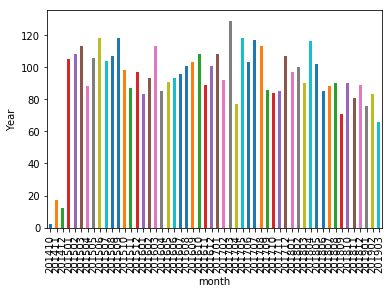

<Figure size 432x288 with 0 Axes>

In [45]:
# Create a bar chart based off of the group series from before
count_chart = count_yrmth.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("month")
count_chart.set_ylabel("Year")

plt.show()
plt.tight_layout()

In [47]:
# testing year chart plotting
year_group = sorted_df.groupby('Year')

# Count how many times each appears in the group
count_yr = year_group['Year'].count()

count_yr.head()

Year
2014      31
2015    1249
2016    1156
2017    1219
2018    1099
Name: Year, dtype: int64

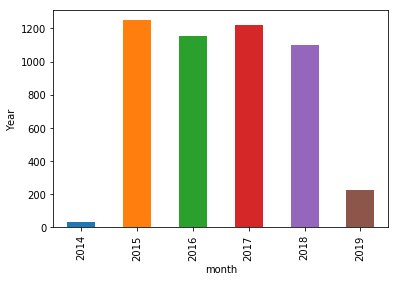

<Figure size 432x288 with 0 Axes>

In [48]:
# Create a bar chart based off of the group series from before
count_yrchart = count_yr.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_yrchart.set_xlabel("month")
count_yrchart.set_ylabel("Year")

plt.show()
plt.tight_layout()

In [8]:
#trying to get numbers by year and month for seperate charts
yearthenmonth_group = sorted_df.groupby(['Year', 'month'])

# Count how many times each appears in the group
count_yrthenmonth = yearthenmonth_group.count()

In [9]:
count_yrthenmonth

Issue Date  Issue time  RP State Plate    Make  Body Style  \
Year month                                                               
2010 01              1           1               1       1           1   
     05              1           1               1       1           1   
     06              2           2               2       2           2   
     09              1           1               1       1           1   
     10             10          10              10      10          10   
     11              1           1               1       1           1   
     12              1           1               1       1           1   
2011 01              2           2               2       2           2   
     03              3           3               3       3           3   
     04              3           3               3       3           3   
     05              2           2               2       2           2   
     07              1           1               1       1           1   
     08              2           2               2       2           2   
     09              4           4               4       4           4   
     10              1           1               1       1           1   
     11              5           5               5       5           5   
     12              1           1               1       1           1   
2012 01              2           2               2       2           2   
     02              2           2               2       2           2   
     03              6           6               6       6           6   
     04              4           4               4       4           4   
     05              4           4               4       4           4   
     06              4           4               4       4           4   
     07              5           5               5       5           5   
     08              4           4               4       4           4   
     09              4           4               4       4           4   
     10              7           7               7       7           7   
     11              4           4               4       4           4   
     12             16          16              16      16          16   
2013 01              4           4               4       4           4   
...                ...         ...             ...     ...         ...   
2016 10         185609      185609          185609  185609      185609   
     11         173900      173900          173900  173900      173900   
     12         190685      190685          190685  190685      190685   
2017 01         183548      183548          183548  183548      183548   
     02         168238      168238          168238  168238      168238   
     03         209707      209707          209707  209707      209707   
     04         193066      193066          193066  193066      193066   
     05         201885      201885          201885  201885      201885   
     06         192662      192662          192662  192662      192662   
     07         189349      189349          189349  189349      189349   
     08         202190      202190          202190  202190      202190   
     09         174451      174451          174451  174451      174451   
     10         184450      184450          184450  184450      184450   
     11         165729      165729          165729  165729      165729   
     12         182773      182773          182773  182773      182773   
2018 01         187480      187480          187480  187480      187480   
     02         166085      166085          166085  166085      166085   
     03         192588      192588          192588  192588      192588   
     04         188649      188649          188649  188649      188649   
     05         181467      181467          181467  181467      181467   
     06         167119      167119          167119  167119      167119   
     07         

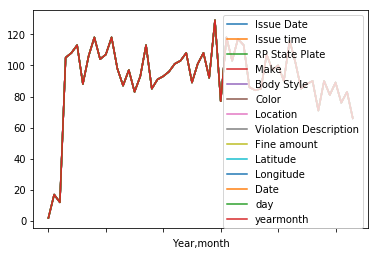

In [21]:
count_yrthenmonth.plot(label='years')

plt.show()

In [23]:
type(count_yrthenmonth)

pandas.core.frame.DataFrame

In [24]:
#Didn't need to do this 
#chart_data_df = pd.DataFrame(count_yrthenmonth)
#chart_data_df.head()

In [10]:
#drop all columns but one for plotting
chart_data_df = count_yrthenmonth.drop(columns = ["Issue time", "RP State Plate", "Make", "Body Style", "Color", "Location",
                               "Violation Description", "Fine amount", "Latitude", "Longitude", "Date", "day", "yearmonth"])
chart_data_df.head()

Issue Date
Year month            
2010 01              1
     05              1
     06              2
     09              1
     10             10

In [29]:
type(chart_data_df)

pandas.core.frame.DataFrame

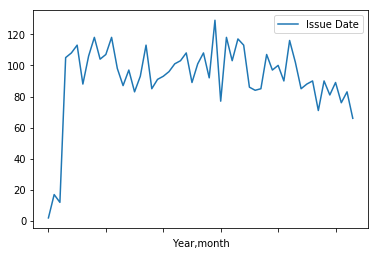

In [27]:
chart_data_df.plot(label='Issue Date')

plt.show()

In [11]:
chart_2015 = chart_data_df.loc["2015", "Issue Date"]
chart_2015

month
01    183341
02    166260
03    194920
04    172263
05    173756
06    198167
07    189708
08    187711
09    184073
10    181676
11    159787
12    180506
Name: Issue Date, dtype: int64

In [12]:
chart_2016 = chart_data_df.loc["2016", "Issue Date"]
chart_2017 = chart_data_df.loc["2017", "Issue Date"]
chart_2018 = chart_data_df.loc["2018", "Issue Date"]
chart_2019 = chart_data_df.loc["2019", "Issue Date"]
chart_2019

month
01    165848
02    158257
03    143245
Name: Issue Date, dtype: int64

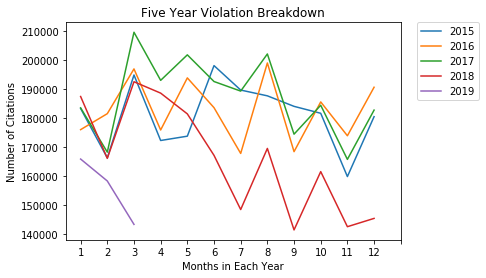

In [39]:
chart_2015.plot(label='2015')
chart_2016.plot(label='2016')
chart_2017.plot(label='2017')
chart_2018.plot(label='2018')
chart_2019.plot(label='2019')

plt.title("Five Year Violation Breakdown")
plt.xlabel("Months in Each Year")
plt.ylabel("Number of Citations")

myticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x = np.arange(0, len(myticks)+1)
#plt.xticks(np.arange(0, 12, step=1))
plt.xticks(x, myticks)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig("Output","FiveYear.png")

plt.show()

In [2]:
#import pandas as pd
#import zipfile

#hwzip = zipfile.ZipFile("parking-citations.csv.zip", mode='r')
#hwdf = pd.read.csv(zf.open("parking-citations.csv"))
#hwdf.head()

import pandas as pd
import numpy as np
# Save path to data set in a variable
read_file = "parking-citations.csv"
# Use Pandas to read data
hwdf = pd.read_csv(read_file)
hwdf.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [3]:
#DataFrame created from original information
new_hwdf = hwdf.drop(columns = ["Ticket number", "Meter Id", "Marked Time", "Plate Expiry Date", "VIN", "Route",
                               "Agency", "Violation code"])
new_hwdf.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
3,2015-12-26T00:00:00,1515.0,CA,ACUR,PA,WH,100 WORLD WAY,17104h,NaN,6440041.1,1802686.2
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [4]:
new_hwdf.dtypes

Issue Date                object
Issue time               float64
RP State Plate            object
Make                      object
Body Style                object
Color                     object
Location                  object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

In [4]:
#renaming column for issue date
renamed_hwdf = new_hwdf.rename(columns={"Issue Date":"Original Issue Date"})
renamed_hwdf.head()

,Original Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
3,2015-12-26T00:00:00,1515.0,CA,ACUR,PA,WH,100 WORLD WAY,17104h,NaN,6440041.1,1802686.2
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [6]:
#Original HW work -> string split function to remove time stamp from Date
updt_hwdf = renamed_hwdf["Original Issue Date"].str.split("T").str[0]
updt_hwdf.head()

0    2015-12-21
1    2015-12-21
2    2015-12-21
3    2015-12-26
4    2015-09-15
Name: Original Issue Date, dtype: object

In [12]:
#setting up dataframe new date column for re-insertion back into final dataframe
getting_there_hwdf = pd.DataFrame(updt_hwdf)
getting_there_hwdf.head()

,Original Issue Date
0,2015-12-21
1,2015-12-21
2,2015-12-21
3,2015-12-26
4,2015-09-15


In [13]:
almost_there_hwdf = getting_there_hwdf.rename(columns={"Original Issue Date":"Issue Date"})
almost_there_hwdf.head()

,Issue Date
0,2015-12-21
1,2015-12-21
2,2015-12-21
3,2015-12-26
4,2015-09-15


In [26]:
#trying to add a column and add a count ID (random ID) to use for future merge -> seems a bit much
#to go through to clean up data
sLength = len(renamed_hwdf['Issue time'])
almost_there_hwdf["Random ID"] = pd.Series([0])
almost_there_hwdf.head()

,Issue Date,Random ID
0,2015-12-21,0.0
1,2015-12-21,NaN
2,2015-12-21,NaN
3,2015-12-26,NaN
4,2015-09-15,NaN


In [21]:
#trying add function to get new Issue date into updated hwdf - basically get the clean date in the dataframe
alst_final_hwdf = renamed_hwdf.add(almost_there_hwdf, fill_value=0)
alst_final_hwdf

TypeError: can only concatenate str (not "float") to str

In [18]:
#attempting to use insert to jam new Issue Date 
#alm_final_hwdf = renamed_hwdf.insert(0, "Clean Issue Date", almost_there_hwdf)
#alm_final_hwdf.head()

ValueError: cannot insert Clean Issue Date, already exists

In [19]:
#using join to add edited Issue Date column back into final data frame
#final_hwdf = renamed_hwdf.join(almost_there_hwdf)
#final_hwdf.head()

ValueError: columns overlap but no suffix specified: Index(['Issue Date'], dtype='object')